# Pre processing of Insurance Data

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
data = pd.read_csv(url)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Missing data?

In [3]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Grouping categories

In [4]:
def group_bmi(x):
    if x<18.5:
        return 'Underweight'
    elif x <= 25:
        return 'Healthy'
    elif x <= 30:
        return 'Overweight'
    elif x <= 40:
        return 'Obese'
    else:
        return 'Extreme obese'
    
data['bmi']=data['bmi'].apply(group_bmi)

In [5]:
def amount_children(x):
    if x == 0:
        return '0 Children'
    if x == 1:
        return '1 Child'
    if x == 2:
        return '2 Children'
    else:
        return '3+ Children'
    
data['children']=data['children'].apply(amount_children)

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,Overweight,0 Children,yes,southwest,16884.92400
1,18,male,Obese,1 Child,no,southeast,1725.55230
2,28,male,Obese,3+ Children,no,southeast,4449.46200
3,33,male,Healthy,0 Children,no,northwest,21984.47061
4,32,male,Overweight,0 Children,no,northwest,3866.85520


### Dummyfication of Variables

In [7]:
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['sex'] = data['sex'].map({'female': 1, 'male': 0})

In [8]:
variables_cat = ['bmi', 'children', 'region']

data = pd.get_dummies(data, columns = variables_cat, drop_first = True)

In [9]:
data.head()

,age,sex,smoker,charges,bmi_Healthy,bmi_Obese,bmi_Overweight,bmi_Underweight,children_1 Child,children_2 Children,children_3+ Children,region_northwest,region_southeast,region_southwest
0,19,1,1,16884.92400,0,0,1,0,0,0,0,0,0,1
1,18,0,0,1725.55230,0,1,0,0,1,0,0,0,1,0
2,28,0,0,4449.46200,0,1,0,0,0,0,1,0,1,0
3,33,0,0,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,0,0,3866.85520,0,0,1,0,0,0,0,1,0,0


### Scale of Continuous Variables

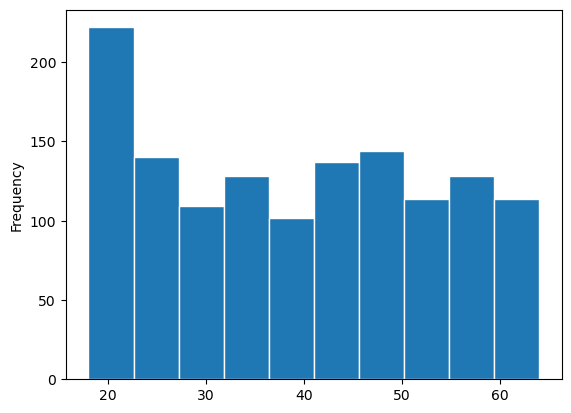

In [10]:
data['age'].plot(kind = 'hist', edgecolor = 'white');

In [11]:
mean = np.mean(data['age'])
std = np.std(data['age'])
data['age'] = (data['age'] - mean)/std

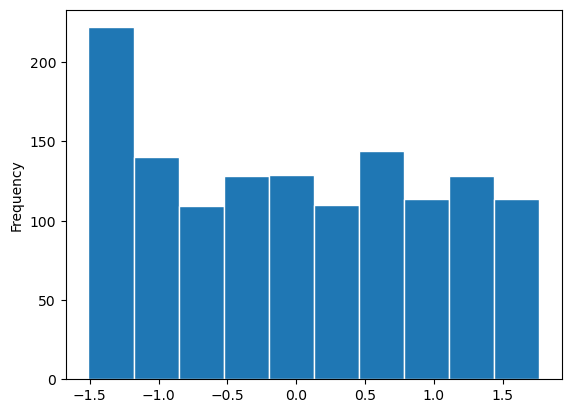

In [12]:
data['age'].plot(kind = 'hist', edgecolor = 'white');

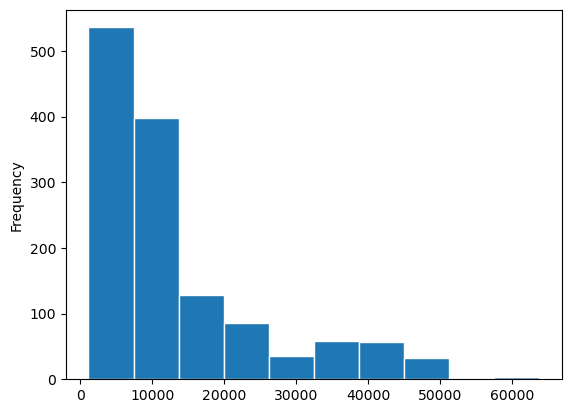

In [13]:
data['charges'].plot(kind = 'hist', edgecolor = 'white');

In [14]:
data['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [16]:
data['charges']=data['charges']/70000

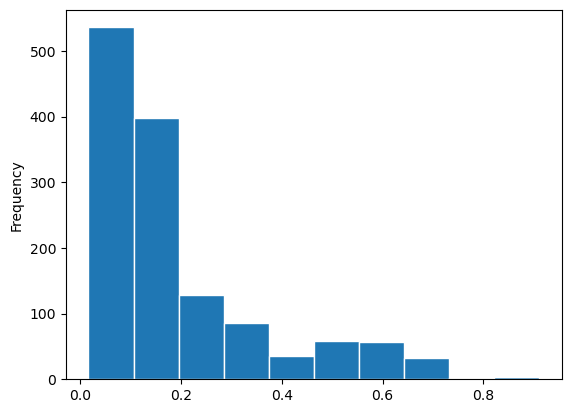

In [17]:
data['charges'].plot(kind = 'hist', edgecolor = 'white');

In [19]:
data.head()

,age,sex,smoker,charges,bmi_Healthy,bmi_Obese,bmi_Overweight,bmi_Underweight,children_1 Child,children_2 Children,children_3+ Children,region_northwest,region_southeast,region_southwest
0,-1.438764,1,1,0.241213,0,0,1,0,0,0,0,0,0,1
1,-1.509965,0,0,0.024651,0,1,0,0,1,0,0,0,1,0
2,-0.797954,0,0,0.063564,0,1,0,0,0,0,1,0,1,0
3,-0.441948,0,0,0.314064,1,0,0,0,0,0,0,1,0,0
4,-0.513149,0,0,0.055241,0,0,1,0,0,0,0,1,0,0


## Modeling

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 

In [22]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

validation = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2)

In [23]:
X = data.drop('smoker', axis = 1)
y = data['smoker']

In [24]:
measures = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']

In [31]:
models = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 4),
                        KNeighborsClassifier(n_neighbors = 8),
                        KNeighborsClassifier(n_neighbors = 12),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=150, max_depth = 5),
                        RandomForestClassifier(n_estimators=150, max_depth = 7),
                        RandomForestClassifier(n_estimators=200, max_depth = 5),
                        RandomForestClassifier(n_estimators=200, max_depth = 7)]

In [32]:
models_names = ['Logistic Regression',
                        'Tree (depth = 3)',
                        'Tree (depth = 5)',
                        'Tree (depth = 7)',
                        'KNN-4',
                        'KNN-8',
                        'KNN-12',
                        'Bagging',
                        'Random Forest (trees = 150, depth = 5)',
                        'Random Forest (trees = 150, depth = 7)',
                        'Random Forest (trees = 200, depth = 5)', 
                        'Random Forest (trees = 200, depth = 7)']

In [33]:
results0 = {}

In [34]:
for i in range(len(models)):

    print('Model running: ' + models_names[i])

    accs_vc = cross_validate(models[i], X, y, cv = validation, scoring = measures)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    results0[models_names[i]] = [acc, sen, vpp, bac, f1s]
    
    
results = pd.DataFrame(results0, index = measures).T

Model running: Logistic Regression
Model running: Tree (depth = 3)
Model running: Tree (depth = 5)
Model running: Tree (depth = 7)
Model running: KNN-4


C:\Users\Katita\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Katita\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Model running: KNN-8


C:\Users\Katita\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Katita\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\Katita\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Katita\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Model running: KNN-12


C:\Users\Katita\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Katita\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Katita\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`

Model running: Bagging
Model running: Random Forest (trees = 150, depth = 5)
Model running: Random Forest (trees = 150, depth = 7)
Model running: Random Forest (trees = 200, depth = 5)
Model running: Random Forest (trees = 200, depth = 7)


In [35]:
results.sort_values(by = 'f1', ascending = False)

,accuracy,recall,precision,balanced_accuracy,f1
Bagging,0.969352,0.947421,0.910696,0.961243,0.927219
Tree (depth = 7),0.964527,0.927381,0.905111,0.950780,0.914932
Tree (depth = 3),0.960751,0.970701,0.861296,0.964424,0.911181
Tree (depth = 5),0.959637,0.949074,0.869173,0.955740,0.906395
"Random Forest (trees = 200, depth = 7)",0.955165,0.932738,0.861710,0.946862,0.895112
"Random Forest (trees = 150, depth = 7)",0.955159,0.926918,0.866779,0.944664,0.895033
"Random Forest (trees = 200, depth = 5)",0.953271,0.917725,0.866701,0.940052,0.889449
"Random Forest (trees = 150, depth = 5)",0.949913,0.910516,0.857306,0.935275,0.881373
Logistic Regression,0.922624,0.724339,0.878991,0.849026,0.791480
KNN-4,0.812412,0.141071,0.714808,0.563253,0.229656
